In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os
import csv

In [2]:
path = "/Users/syam/Desktop/ZotBins/image classification"
class_files = open(path + "/classes_MASTER.txt", 'r')
class_name = class_files.read().splitlines() 
print(class_name)
class_files.close()

['bottle', 'utensils', 'chip_bag', 'soda_can', 'napkin', 'condiment_packets', 'bowl', 'chopsticks', 'subway_bag', 'starbucks_glass_bottle', 'drinking_straw', 'clamshell_containers', 'beverage_cup', 'clear_plastic_container', 'coffee_cup']


In [3]:
all_image_names = list() #contains names of all images
for f in os.listdir(path + "/data_MASTER"):
    if f.endswith(".jpg") or f.endswith(".JPG"):
        all_image_names.append(os.path.join("", f))
print(len(all_image_names)) #number of images in data_master

5108


In [4]:
all_image_desc = list() #contains names of all text files
for f in os.listdir(path + "/data_MASTER"):
    if f.endswith(".txt"):
        all_image_desc.append(os.path.join("", f))
print(len(all_image_desc)) #number of text files in data_master

4243


In [11]:
df = pd.read_csv("labels.csv", usecols = ['image_name','class'])
image_desc = list() 
for i in all_image_desc:
    if i in df.values:
        image_desc.append(i)
print(df) #information in labels.csv
print(len(image_desc)) #number of images with one object in data_master

                image_name  class
0     00a36f96e31731c4.txt      0
1     00b729b5187a1898.txt      0
2     012b0f6b12da485f.txt      1
3     01495549e1f4fd2e.txt      0
4     024fc048dd1cb61a.txt      0
...                    ...    ...
3136    subway_wrap-79.txt      8
3137    subway_wrap-80.txt      8
3138    subway_wrap-81.txt      8
3139    subway_wrap-82.txt      8
3140    subway_wrap-83.txt      8

[3141 rows x 2 columns]
2342


In [6]:
print(len(df[df['class'] == 0])) #number of images with 1 bottle

955


In [7]:
def deconvert(img_w,img_h,annbox):
        ox = float(annbox[0])
        oy = float(annbox[1])
        ow = float(annbox[2])
        oh = float(annbox[3])
        x = ox*img_w
        y = oy*img_h
        w = ow*img_w
        h = oh*img_h
        xmax = (((2*x)+w)/2)
        xmin = xmax-w
        ymax = (((2*y)+h)/2)
        ymin = ymax-h
        return [int(xmin),int(ymin),int(xmax),int(ymax)]

In [8]:
img = Image.open(path + "/data_MASTER/"+'00a36f96e31731c4.jpg')
img_w, img_h = img.size
labelname = '00a36f96e31731c4.txt'
labelfilename = os.path.join(path + "/data_MASTER/",labelname)
with open(labelfilename) as f:
    for (i, line) in enumerate(f):
        data = line.strip().split()
        tmp = deconvert(img_w, img_h, data[1:])
    

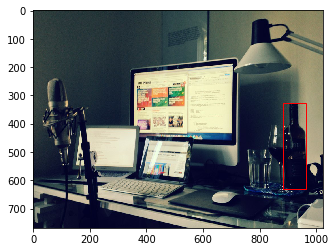

In [9]:
im = np.array(Image.open(path + "/data_MASTER/"+'00a36f96e31731c4.jpg'), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)
height = tmp[2]-tmp[0]
width = tmp[3]-tmp[1]
# Create a Rectangle patch
rect = patches.Rectangle((tmp[0],tmp[1]),height,width,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [15]:
img_crop = img.crop((tmp[0],tmp[1],tmp[2],tmp[3]))
img_crop.save(path+'/bottles/'+'00a36f96e31731c4.jpg', quality=95)

In [40]:
for i in df.image_name:
    if i in image_desc and df.loc[df['image_name']==i, 'class'].iloc[0] == 0:
        jpg = i[:-3] + 'jpg'
        img = Image.open(path + "/data_MASTER/"+jpg)
        img_w, img_h = img.size
        labelname = i
        labelfilename = os.path.join(path + "/data_MASTER/",labelname)
        with open(labelfilename) as f:
            for (i, line) in enumerate(f):
                data = line.strip().split()
                tmp = deconvert(img_w, img_h, data[1:])
        img_crop = img.crop((tmp[0],tmp[1],tmp[2],tmp[3]))
        img_crop = img_crop.convert('RGB')
        img_crop.save(path+'/bottles/'+jpg, quality=95)